# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

Missing Value Counts:
patient_id               0
age                      0
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64

Missing Value Percentages:
patient_id             0.00
age                    0.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0.00
adh

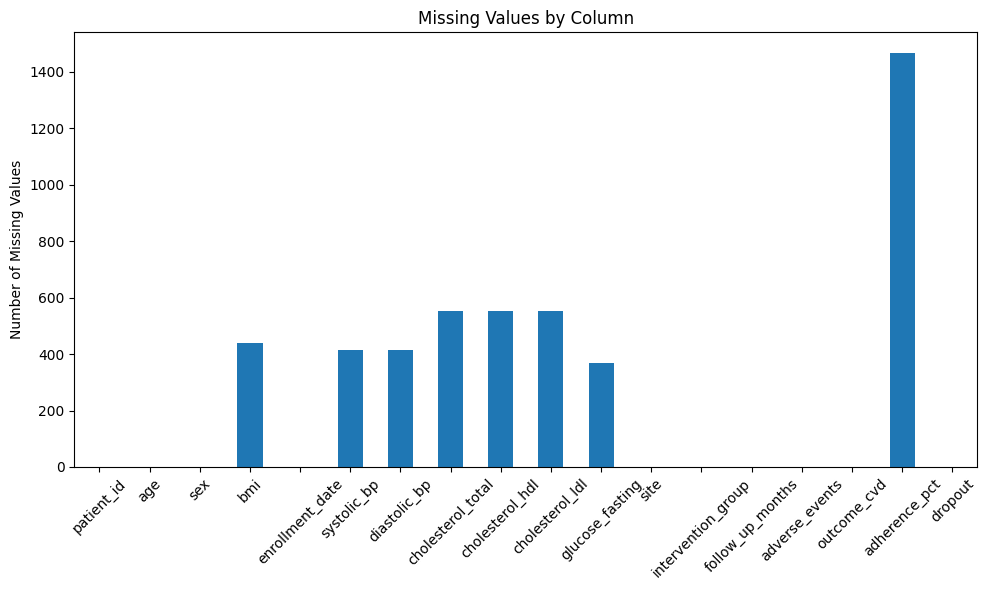

In [2]:
# TODO: Detect and analyze missing data
# 1. Use detect_missing(df) to get missing value counts
# 2. Calculate percentage of missing values per column  
# 3. Print both counts and percentages
# 4. Identify which columns have missing data

# Optional: Use the visualization function above to create a bar chart
# visualize_missing_data(missing_counts)
missing_count = detect_missing(df)
missing_percentage = (missing_count / len(df)) * 100
print("Missing Value Counts:")
print(missing_count)
print("\nMissing Value Percentages:")
print(missing_percentage)
columns_with_missing = missing_count[missing_count > 0].index.tolist()
print("\nColumns with missing data:", columns_with_missing)

visualize_missing_data(missing_count)

## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [3]:
from q3_data_utils import fill_missing


missing_count = detect_missing(df)
print(missing_count['cholesterol_total'])

df_filled_mean = df.copy()
df_filled_median = df.copy()
df_forward_fill = df.copy()

# TODO: Compare imputation strategies
df_filled_mean = fill_missing(df_filled_mean, 'cholesterol_total', strategy='mean')
#print(df_filled_mean)
#print(df_filled_mean['cholesterol_total'].describe())
df_filled_median = fill_missing(df_filled_median, 'cholesterol_total', strategy='median')
#print(df_filled_median)
#print(df_filled_median['cholesterol_total'].describe())

df_forward_fill = fill_missing(df_forward_fill, 'cholesterol_total', strategy='ffill')
#df_forward_fill.columns
#print(df_forward_fill['cholesterol_total'])
#print(df_forward_fill['cholesterol_total'].describe())
original = df['cholesterol_total']
# number of values filled:
col = "cholesterol_total"

def n_filled(original, filled, col):
    return int((original.isna() & filled[col].notna()).sum())

stats = pd.concat({
    "Original":      original.describe(),
    "Mean Imputed":  df_filled_mean[col].describe(),
    "Median Imputed":df_filled_median[col].describe(),
    "Forward Fill":  df_forward_fill[col].describe(),
}, axis=1)

filled_counts = pd.Series({
    "Original":       0,  
    "Mean Imputed":   n_filled(original, df_filled_mean, col),
    "Median Imputed": n_filled(original, df_filled_median, col),
    "Forward Fill":   n_filled(original, df_forward_fill, col),
})

median = pd.Series({
    "Original":       original.median(),  
    "Mean Imputed":   df_filled_mean[col].median(),
    "Median Imputed": df_filled_median[col].median(),
    "Forward Fill":   df_forward_fill[col].median(),
})

stats.loc["Median"] = median
stats.loc["Filled"] = filled_counts

print(stats)


554
           Original  Mean Imputed  Median Imputed  Forward Fill
count   9446.000000  10000.000000    10000.000000  10000.000000
mean     178.039488    178.039488      177.981900    178.070500
std       33.129034     32.198191       32.199069     33.178267
min       91.000000     91.000000       91.000000     91.000000
25%      155.000000    156.000000      156.000000    155.000000
50%      177.000000    178.039488      177.000000    177.000000
75%      200.000000    198.000000      198.000000    200.000000
max      315.000000    315.000000      315.000000    315.000000
Median   177.000000    178.039488      177.000000    177.000000
Filled     0.000000    554.000000      554.000000    554.000000


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [4]:
# TODO: Drop missing rows with different strategies
drop_missing = df.dropna()
print("Length after dropping all missing rows:")
print(len(drop_missing))
print("Length after dropping rows with missing age or bmi:")
drop_specific = df.dropna(subset=['age', 'bmi'])
print(len(drop_specific))

print("The approach of dropping rows where specific columns have missing data loses less data. ")
# The approach of dropping rows where specific columns have missing data loses less data. 

Length after dropping all missing rows:
7133
Length after dropping rows with missing age or bmi:
9562
The approach of dropping rows where specific columns have missing data loses less data. 


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [5]:
# TODO: Create and save clean dataset
num_cols = df.select_dtypes(include="number").columns
df_copy = df.copy()
for col in num_cols:
    df_copy = fill_missing(df_copy, col, strategy='median')

print(f"Number of missing values after cleaning: {detect_missing(df_copy).sum()}")
drop_columns = ['age', 'patient_id']
drop_rows = df_copy.dropna(subset=drop_columns)

drop_rows.to_csv('output/q5_cleaned_data.csv')

missing_data = detect_missing(drop_rows)
print("Missing values in cleaned data:\n", missing_data)

with open('output/q5_missing_report.txt', 'w') as file:
    print("Missing values in cleaned data:", file=file)
    print(missing_data, file=file)


Number of missing values after cleaning: 0
Missing values in cleaned data:
 patient_id            0
age                   0
sex                   0
bmi                   0
enrollment_date       0
systolic_bp           0
diastolic_bp          0
cholesterol_total     0
cholesterol_hdl       0
cholesterol_ldl       0
glucose_fasting       0
site                  0
intervention_group    0
follow_up_months      0
adverse_events        0
outcome_cvd           0
adherence_pct         0
dropout               0
dtype: int64


## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

For this dataset, I would recommend the imputation strategy of filling missing values with the median. The reason being it can preserve the distribution better, from the summary table in Part 2, the standard deviation is roughly the same, so it kept the distrbution regardless of the data. Another point is that using median is more robust to outliers, if we see the mean values afterwards, the mean for all the other strategies are slightly higher, so that means they were affected by the outliers in some ways.  